# Anomaly detection example functions

In [11]:
import numpy as np
import pandas as pd
import models
import utils
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('data/Data.csv', sep=';')
data = pd.DataFrame(data[['Time', 'x013']])
data.iloc[:, 1]

0       49.2
1       49.2
2       49.1
3       49.1
4       49.1
        ... 
6606    50.6
6607    50.6
6608    50.6
6609    50.7
6610    50.7
Name: x013, Length: 6611, dtype: float64

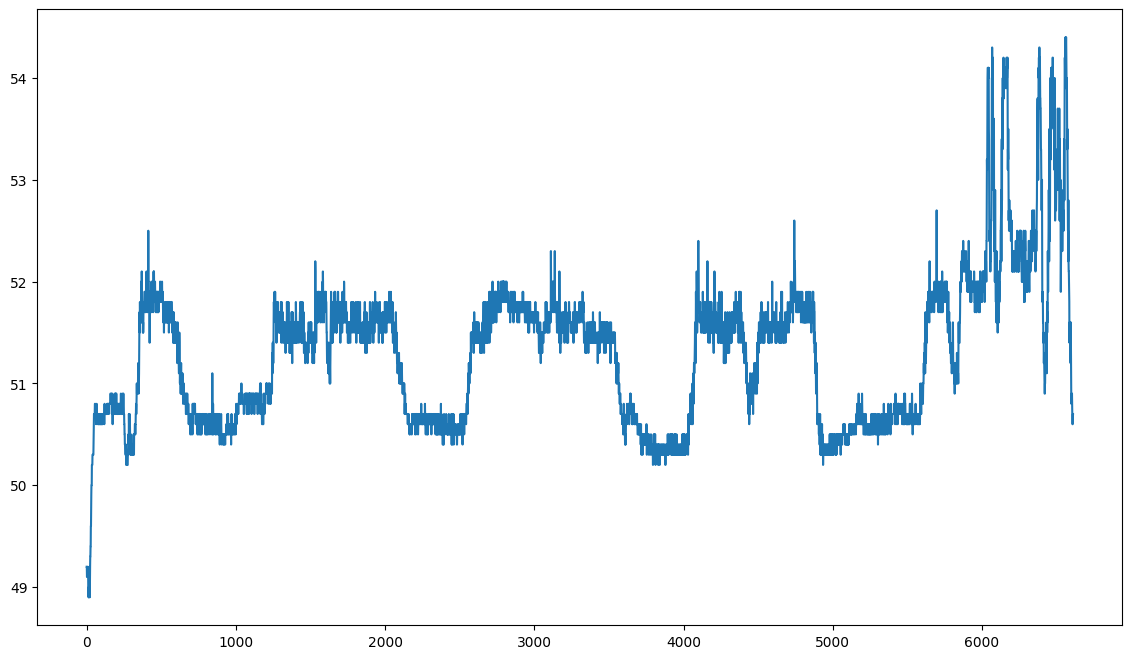

In [13]:
plt.figure(figsize=(14, 8))

plt.plot(data.iloc[:, 1])

## Const std model:

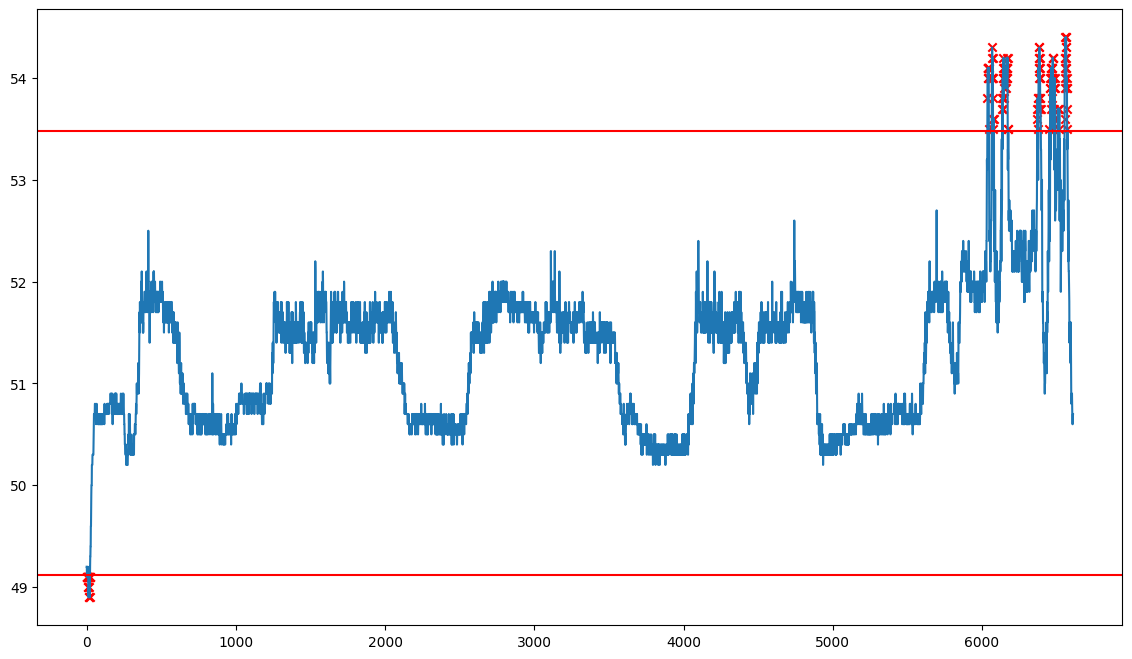

In [14]:
anomalies, bounds = models.std_model(data=data.iloc[:, 1],
                                            threshold=3,
                                            roll=False)

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

# Roll std model:

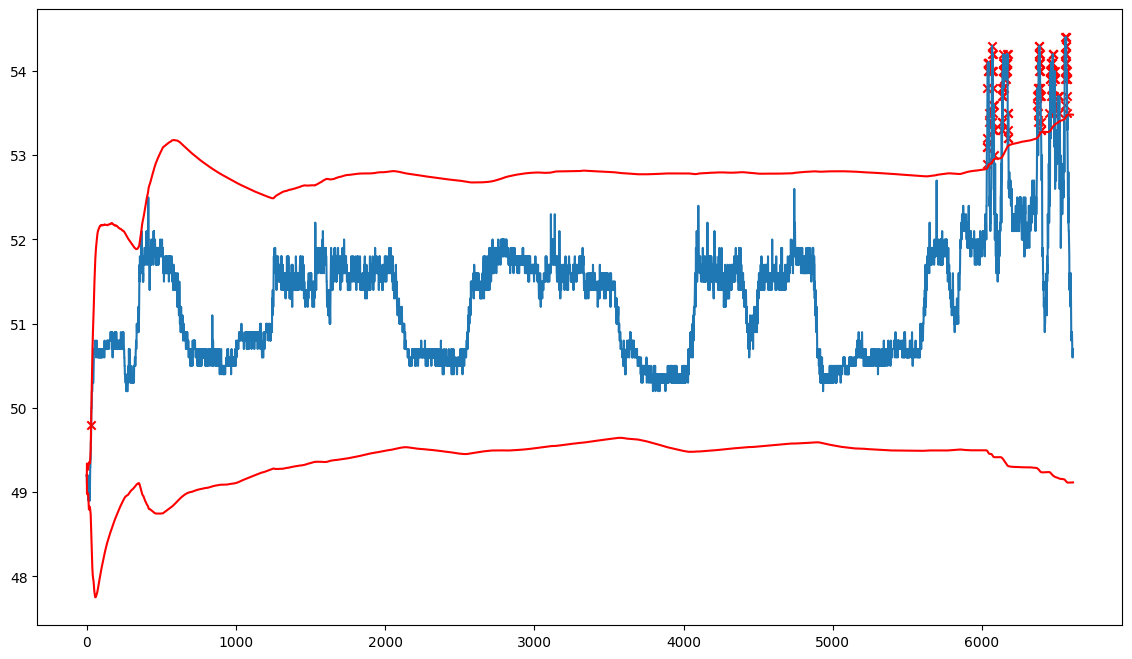

In [15]:
# as data param needs pd.Series

anomalies, bounds = models.std_model(data=data.iloc[:, 1],
                                            threshold=3,
                                            roll=True)

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

## Const IQR model:

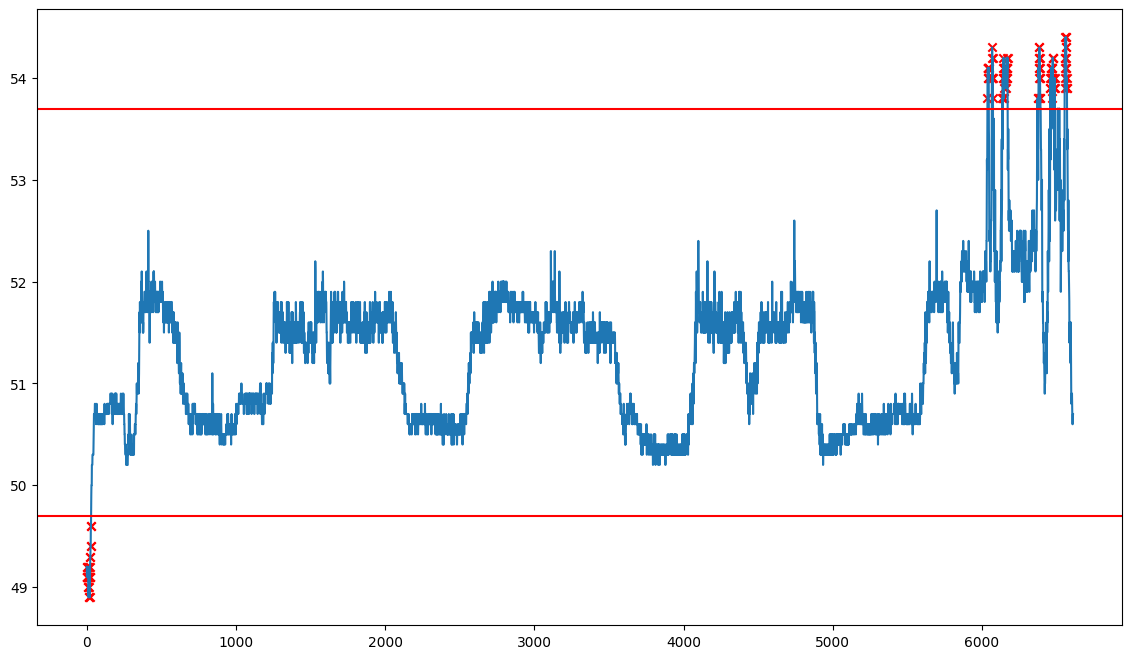

In [16]:
anomalies, bounds = models.iqr_model(data=data.iloc[:, 1],
                                     threshold=2,
                                     roll=False)
utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

# Roll IQR model:

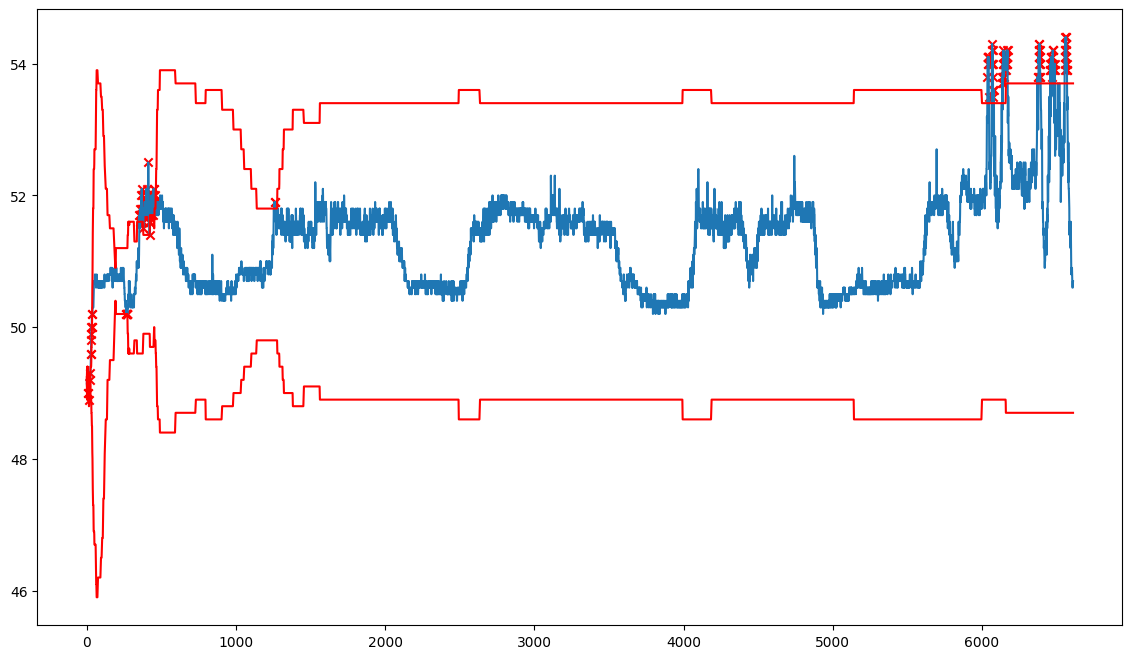

In [17]:
anomalies, bounds = models.iqr_model(data=data.iloc[:, 1],
                                     threshold=2,
                                     roll=True)
utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies,
                     bounds=bounds)

## LSTM anomaly detection model:

In [18]:
model = models.ModelLSTM(1, 2, 1)

anomaly_lstm = models.AnomalyLSTM(nn_model=model,
                                  data=data,
                                  num_epochs=5,
                                  n_splits=15,
                                  threshold=3,
                                  plot=False,
                                  all_outputs=True,
                                  show_print=False)

anomalies = anomaly_lstm.anomalies

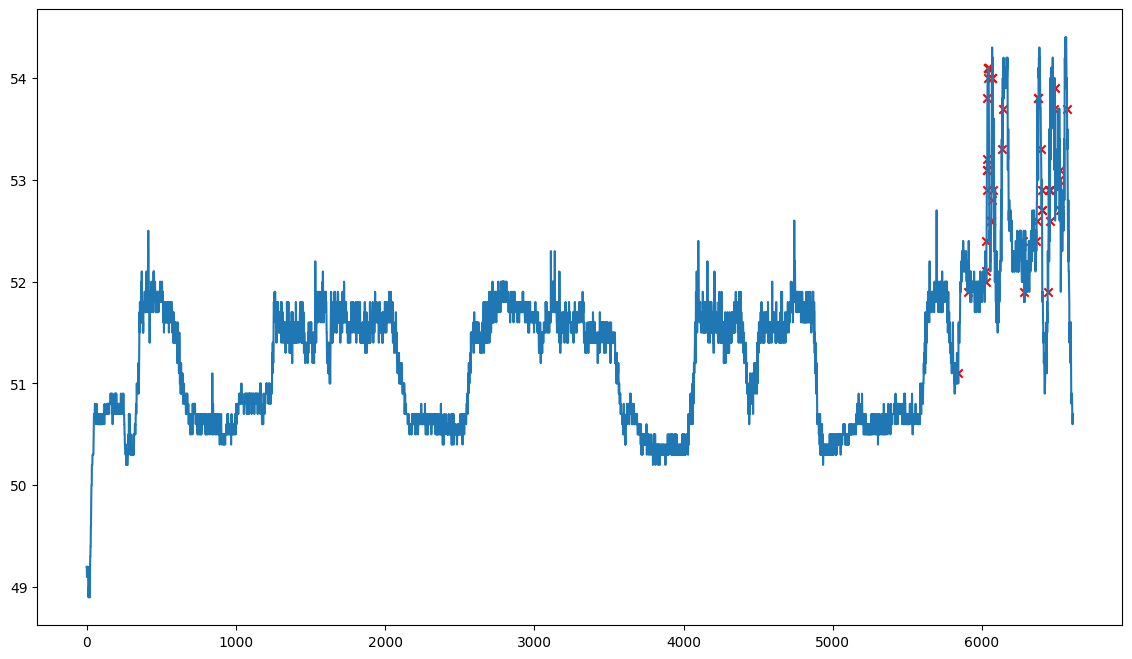

In [19]:
utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=anomalies)